In [1]:
import  os, time
import  numpy as np
import  matplotlib.pyplot as plt
import  tensorflow as tf
from tensorflow.keras import datasets, utils, layers, models, losses, optimizers, metrics, initializers

seed = 13
tf.random.set_seed(seed)
np.random.seed(seed)

In [2]:
def load_url_data():
    if os.path.isdir("./data/horse2zebra"):
        print("File Exists")
    else:        
        path_to_zip = utils.get_file(fname="horse2zebra.zip", cache_subdir=os.path.abspath(".\data"),
                                 origin="https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip",
                                extract=True)
load_url_data()

File Exists


In [3]:
trainA_path = os.path.join(".","data","horse2zebra","trainA/")
trainB_path = os.path.join(".","data","horse2zebra","trainB/")
trainA_size = len(os.listdir(trainA_path))
trainB_size = len(os.listdir(trainB_path))
print(trainA_path)
print(trainB_path)
print("train A:",trainA_size)
print("train B:",trainB_size)


.\data\horse2zebra\trainA/
.\data\horse2zebra\trainB/
train A: 1067
train B: 1334


In [4]:
#del Encoder, Residual, Decoder, Generator, Discriminator
class Encoder(models.Model):
    def __init__(self, img_size):
        super(Encoder, self).__init__(name="Encoder_1")  
        self.conv1 = layers.Conv2D(32, kernel_size=7, strides=1, padding='same', activation="relu",
                               name="enc_conv_1", kernel_initializer=initializers.RandomNormal(stddev=0.02))
        self.conv2 = layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation="relu",
                               name="enc_conv_2", kernel_initializer=initializers.RandomNormal(stddev=0.02))
        self.conv3 = layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation="relu",
                               name="enc_conv_3", kernel_initializer=initializers.RandomNormal(stddev=0.02))        
        
        self.bn1 = layers.BatchNormalization(name="enc_bn_1")
        self.bn2 = layers.BatchNormalization(name="enc_bn_2")
        self.bn3 = layers.BatchNormalization(name="enc_bn_3")        
        
    def call(self, inputs):  
       # x = tf.pad(inputs, [[0, 0], [3, 3], [3, 3], [0, 0]], "REFLECT")        
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.conv3(x)
        x = self.bn3(x)        
        return x

        
class Residual(models.Model):
    def __init__(self, img_size, index):
        super(Residual, self).__init__(name="Residual_"+str(index))
        index = index * 2
        index_1 = str(index)
        index_2 = str(index+1)        
        self.conv1 = layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu",
                               name="conv_"+index_1, kernel_initializer=initializers.RandomNormal(stddev=0.02))
        self.conv2 = layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", 
                               name="conv_"+index_2, kernel_initializer=initializers.RandomNormal(stddev=0.02))
        self.bn1 = layers.BatchNormalization(name="bn_"+index_1)
        self.bn2 = layers.BatchNormalization(name="bn_"+index_2)

    def call(self, inputs):
        #x = tf.pad(inputs, [[0, 0], [1, 1], [1, 1], [0, 0]], "REFLECT")
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = tf.add(x, inputs)
        return x

class Decoder(models.Model):
    def __init__(self, img_size):
        super(Decoder, self).__init__(name="Decoder_1")
        self.conv1 = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation="relu",
                               name="dec_conv_1", kernel_initializer=initializers.RandomNormal(stddev=0.02))
        self.conv2 = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation="relu",
                               name="dec_conv_2", kernel_initializer=initializers.RandomNormal(stddev=0.02))
        self.conv3 = layers.Conv2D(filters=3, kernel_size=7, strides=1, padding='same', activation="tanh",
                               name="dec_conv_3", kernel_initializer=initializers.RandomNormal(stddev=0.02))
        self.bn1 = layers.BatchNormalization(name="dec_bn_1")
        self.bn2 = layers.BatchNormalization(name="dec_bn_2")
        self.bn3 = layers.BatchNormalization(name="dec_bn_3")
        
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        #x = tf.pad(x, [[0, 0], [3, 3], [3, 3], [0, 0]], "REFLECT")
        x = self.conv3(x)
        x = self.bn3(x)
        return x
    
class Generator(models.Model):
    def __init__(self, img_size):
        super(Generator, self).__init__(name="Generator_1")
        self.model = self.create_model(img_size)
#         self.encoder = Encoder(img_size)        
#         self.res1 = Residual(img_size, index=0)
#         self.res2 = Residual(img_size, index=1)
#         self.res3 = Residual(img_size, index=2)
#         self.res4 = Residual(img_size, index=3)
#         self.res5 = Residual(img_size, index=4)
#         self.res6 = Residual(img_size, index=5)
#         self.res7 = Residual(img_size, index=6)
#         self.res8 = Residual(img_size, index=7)
#         self.res9 = Residual(img_size, index=8)        
#         self.decoder = Decoder(img_size)        
        #self.build(input_shape=(None,256,256,3))
        
    def call(self, inputs):
        x = self.model(inputs)
#         x = self.encoder(inputs)
#         x = self.res1(x)
#         x = self.res2(x)
#         x = self.res3(x)
#         x = self.res4(x)
#         x = self.res5(x)
#         x = self.res6(x)
#         x = self.res7(x)
#         x = self.res8(x)
#         x = self.res9(x)
#         x = self.decoder(x)
        return x
    def create_model(self, img_size):
        model = models.Sequential(name="Gen_AAAAAA")
        model.add(Encoder(img_size))
        model.add(Residual(img_size, index=8))
        model.add(Residual(img_size, index=7))
        model.add(Residual(img_size, index=6))
        model.add(Residual(img_size, index=5))
        model.add(Residual(img_size, index=0))
        model.add(Residual(img_size, index=1))
        model.add(Residual(img_size, index=2))
        model.add(Residual(img_size, index=3))
        model.add(Residual(img_size, index=4))        
        model.add(Decoder(img_size))
        return model
    
class Discriminator(models.Model):
    def __init__(self, img_size):
        super(Discriminator, self).__init__(name="Discriminator_1")
        self.model = self.create_model(img_size)
#         self.conv1 = layers.Conv2D(filters=img_size//4, kernel_size=4, strides=2, padding="same",
#                                 activation=layers.LeakyReLU(alpha=0.2),
#                                 name="conv_1", kernel_initializer=initializers.RandomNormal(stddev=0.02))
#         self.conv2 = layers.Conv2D(filters=img_size//2, kernel_size=4, strides=2, padding="same",
#                                 activation=layers.LeakyReLU(alpha=0.2),
#                                 name="conv_2", kernel_initializer=initializers.RandomNormal(stddev=0.02))
#         self.conv3 = layers.Conv2D(filters=img_size, kernel_size=4, strides=2, padding="same",
#                                 activation=layers.LeakyReLU(alpha=0.2),
#                                 name="conv_3", kernel_initializer=initializers.RandomNormal(stddev=0.02))
#         self.conv4 = layers.Conv2D(filters=img_size*2, kernel_size=4, strides=1, padding="same",
#                                 activation=layers.LeakyReLU(alpha=0.2),
#                                 name="conv_4", kernel_initializer=initializers.RandomNormal(stddev=0.02))
#         self.conv5 = layers.Conv2D(filters=1, kernel_size=4, strides=1, padding="same",
#                                 activation="sigmoid",
#                                 name="conv_5", kernel_initializer=initializers.RandomNormal(stddev=0.02))
#         self.bn1 = layers.BatchNormalization(name="bn_1")
#         self.bn2 = layers.BatchNormalization(name="bn_2")
#         self.bn3 = layers.BatchNormalization(name="bn_3")

    def call(self, inputs):
        x = self.model(inputs)
#         x = self.conv1(inputs)
#         x = self.conv2(x)
#         x = self.bn1(x)
#         x = self.conv3(x)
#         x = self.bn2(x)
#         x = self.conv4(x)
#         x = self.bn3(x)
#         x = self.conv5(x)
        return x
    def create_model(self, img_size):
        model = models.Sequential(name="Dis_AAAAAA")
        model.add(layers.Conv2D(filters=img_size//4, kernel_size=4, strides=2, padding="same",
                                activation=layers.LeakyReLU(alpha=0.2),
                                name="conv_1", kernel_initializer=initializers.RandomNormal(stddev=0.02)))
        model.add(layers.Conv2D(filters=img_size//2, kernel_size=4, strides=2, padding="same",
                                activation=layers.LeakyReLU(alpha=0.2),
                                name="conv_2", kernel_initializer=initializers.RandomNormal(stddev=0.02)))
        model.add(layers.BatchNormalization(name="bn_1"))
        model.add(layers.Conv2D(filters=img_size, kernel_size=4, strides=2, padding="same",
                                activation=layers.LeakyReLU(alpha=0.2),
                                name="conv_3", kernel_initializer=initializers.RandomNormal(stddev=0.02)))
        model.add(layers.BatchNormalization(name="bn_2"))
        model.add(layers.Conv2D(filters=img_size*2, kernel_size=4, strides=1, padding="same",
                                activation=layers.LeakyReLU(alpha=0.2),
                                name="conv_4", kernel_initializer=initializers.RandomNormal(stddev=0.02)))
        model.add(layers.Conv2D(filters=1, kernel_size=4, strides=1, padding="same",
                                activation="sigmoid",
                                name="conv_5", kernel_initializer=initializers.RandomNormal(stddev=0.02)))
        model.add(layers.BatchNormalization(name="bn_3"))
        return model


In [5]:
a = Generator(256)
a.build(input_shape=(None,256,256,3))
a.model.summary()

Model: "Gen_AAAAAA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoder_1 (Encoder)          multiple                  97984     
_________________________________________________________________
Residual_8 (Residual)        multiple                  296192    
_________________________________________________________________
Residual_7 (Residual)        multiple                  296192    
_________________________________________________________________
Residual_6 (Residual)        multiple                  296192    
_________________________________________________________________
Residual_5 (Residual)        multiple                  296192    
_________________________________________________________________
Residual_0 (Residual)        multiple                  296192    
_________________________________________________________________
Residual_1 (Residual)        multiple                  2

In [6]:
a.model.layers[0].summary()
a.model.layers[5].summary()
a.model.layers[-1].summary()

Model: "Encoder_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
enc_conv_1 (Conv2D)          multiple                  4736      
_________________________________________________________________
enc_conv_2 (Conv2D)          multiple                  18496     
_________________________________________________________________
enc_conv_3 (Conv2D)          multiple                  73856     
_________________________________________________________________
enc_bn_1 (BatchNormalization multiple                  128       
_________________________________________________________________
enc_bn_2 (BatchNormalization multiple                  256       
_________________________________________________________________
enc_bn_3 (BatchNormalization multiple                  512       
Total params: 97,984
Trainable params: 97,536
Non-trainable params: 448
___________________________________________________

In [7]:
b = Discriminator(256)
b.build(input_shape=(None,256,256,3))
b.model.summary()

Model: "Dis_AAAAAA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              multiple                  3136      
_________________________________________________________________
conv_2 (Conv2D)              multiple                  131200    
_________________________________________________________________
bn_1 (BatchNormalization)    multiple                  512       
_________________________________________________________________
conv_3 (Conv2D)              multiple                  524544    
_________________________________________________________________
bn_2 (BatchNormalization)    multiple                  1024      
_________________________________________________________________
conv_4 (Conv2D)              multiple                  2097664   
_________________________________________________________________
conv_5 (Conv2D)              multiple                  8

img shape: (1, 256, 256, 3) 0.0 1.0
img shape: (1, 256, 256, 3) 0.0 1.0


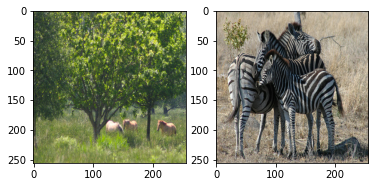

In [8]:

def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [256,256])
    #image = (image / 127.5) - 1
    #image = image *2 -1
    return image

batch_size = 1 # Set batch size to 4 or 16 if training multigpu
epochs = 1000

train_datasetA = tf.data.Dataset.list_files(trainA_path + '*.jpg', shuffle=False)
train_datasetA = train_datasetA.shuffle(trainA_size).repeat(epochs)
train_datasetA = train_datasetA.map(lambda x: load_image(x)) # 將pixel 256 轉成 0.~1.的值
train_datasetA = train_datasetA.batch(batch_size)
train_datasetA = train_datasetA.prefetch(batch_size) # 指定 iter送多少 batch 出去
train_datasetA = iter(train_datasetA)

train_datasetB = tf.data.Dataset.list_files(trainB_path + '*.jpg', shuffle=False)
train_datasetB = train_datasetB.shuffle(trainB_size).repeat(epochs)
train_datasetB = train_datasetB.map(lambda x: load_image(x)) # 將pixel 256 轉成 0.~1.的值
train_datasetB = train_datasetB.batch(batch_size)
train_datasetB = train_datasetB.prefetch(batch_size) # 指定 iter送多少 batch 出去
train_datasetB = iter(train_datasetB)
a = next(train_datasetA)
print('img shape:', a.shape, a.numpy().min(), a.numpy().max())
b = next(train_datasetB)
print('img shape:', b.shape, b.numpy().min(), b.numpy().max())
plt.figure()
plt.subplot(1,2,1)
a = np.reshape(a, (256,256,3))
plt.imshow(a)
plt.subplot(1,2,2)
b = np.reshape(b, (256,256,3))
plt.imshow(b)
plt.show()
del a,b

In [9]:
img_size = 256
learning_rate = 0.05

discA = Discriminator(img_size)
discB = Discriminator(img_size)
genA2B = Generator(img_size)
genB2A = Generator(img_size)

discA_optimizer = optimizers.Adam(learning_rate, beta_1=0.5)
discB_optimizer = optimizers.Adam(learning_rate, beta_1=0.5)
genA2B_optimizer = optimizers.Adam(learning_rate, beta_1=0.5)
genB2A_optimizer = optimizers.Adam(learning_rate, beta_1=0.5)

In [11]:
img_size = 256
learning_rate = 0.05

discA = Discriminator(img_size)
discB = Discriminator(img_size)
genA2B = Generator(img_size)
genB2A = Generator(img_size)

discA_optimizer = optimizers.Adam(learning_rate, beta_1=0.5)
discB_optimizer = optimizers.Adam(learning_rate, beta_1=0.5)
genA2B_optimizer = optimizers.Adam(learning_rate, beta_1=0.5)
genB2A_optimizer = optimizers.Adam(learning_rate, beta_1=0.5)


epochs = 1

def discriminator_loss(disc_of_real_output, disc_of_gen_output, lsgan=True):
    if lsgan: # Use least squares loss
        real_loss = losses.mean_squared_error(disc_of_real_output, tf.ones_like(disc_of_real_output))
        generated_loss = tf.reduce_mean(tf.square(disc_of_gen_output))
        total_disc_loss = (real_loss + generated_loss) * 0.5 # 0.5 slows down rate that D learns compared to G
    else:
        raise NotImplementedError
        real_loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=tf.ones_like(disc_of_real_output),
                                                    logits=disc_of_real_output)
        generated_loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=tf.zeros_like(disc_of_gen_output),
                                                         logits=disc_of_gen_output)
        total_disc_loss = real_loss + generated_loss 
    
    return total_disc_loss

def generator_loss(disc_of_gen_output, lsgan=True):
    if lsgan:
        gen_loss = losses.mean_squared_error(disc_of_gen_output,
                                             tf.ones_like(disc_of_gen_output))
    else:
        raise NotImplementedError
        gen_loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=tf.ones_like(disc_generated_output),
                                                   logits=disc_generated_output)
        
    return gen_loss

def cycle_consistency_loss(data_A, data_B, reconstructed_data_A, reconstructed_data_B, cyc_lambda=10):
    loss = tf.reduce_mean(tf.abs(data_A - reconstructed_data_A) + tf.abs(data_B - reconstructed_data_B))
    return cyc_lambda * loss
    
def train(lsgan=True, cyc_lambda=10):
    for epoch in range(epochs):
        start = time.time()
        with tf.GradientTape() as genA2B_tape, tf.GradientTape() as genB2A_tape, \
                tf.GradientTape() as discA_tape, tf.GradientTape() as discB_tape:
            try:
                trainA = next(train_datasetA)
                trainB = next(train_datasetB)
            except tf.errors.OutOfRangeError:
                print("Error, run out of data")
                break
                
            genA2B_output = genA2B(trainA)
            genB2A_output = genB2A(trainB)
            
            discA_real_output = discA(trainA)
            discB_real_output = discB(trainB)
            
            discA_fake_output = discA(genB2A_output)
            discB_fake_output = discB(genA2B_output)
            
            reconstructedA = genB2A(genA2B_output)
            reconstructedB = genA2B(genB2A_output)
            
            # generate_images(reconstructedA, reconstructedB)
            
            discA_loss = discriminator_loss(discA_real_output, discA_fake_output, lsgan=lsgan)
            discB_loss = discriminator_loss(discB_real_output, discB_fake_output, lsgan=lsgan)
            
            genA2B_loss = generator_loss(discB_fake_output, lsgan=lsgan) + \
                            cycle_consistency_loss(trainA, trainB, reconstructedA, reconstructedB,
                                                 cyc_lambda=cyc_lambda)
            genB2A_loss = generator_loss(discA_fake_output, lsgan=lsgan) + \
                          cycle_consistency_loss(trainA, trainB, reconstructedA, reconstructedB,
                                                 cyc_lambda=cyc_lambda)
            
        genA2B_gradients = genA2B_tape.gradient(genA2B_loss, genA2B.trainable_variables)
        genB2A_gradients = genB2A_tape.gradient(genB2A_loss, genB2A.trainable_variables)

        discA_gradients = discA_tape.gradient(discA_loss, discA.trainable_variables)
        discB_gradients = discB_tape.gradient(discB_loss, discB.trainable_variables)

        genA2B_optimizer.apply_gradients(zip(genA2B_gradients, genA2B.trainable_variables))
        genB2A_optimizer.apply_gradients(zip(genB2A_gradients, genB2A.trainable_variables))

        discA_optimizer.apply_gradients(zip(discA_gradients, discA.trainable_variables))
        discB_optimizer.apply_gradients(zip(discB_gradients, discB.trainable_variables))        
        
        if (epoch+1) % 40 == 0:
            print('Time taken for epoch {} is {} sec'.format(epoch + 1, time.time() - start))
            print(trainA.shape)
            print(trainB.shape)
            print(genB2A_output.shape)
            print(genA2B_output.shape)
            generate_images(trainA, trainB, genB2A_output, genA2B_output, epoch)
            
    print("Finish Training")
            
def generate_images(A, B, B2A, A2B, epoch):
    """
    :param A:
    :param B:
    :param B2A:
    :param A2B:
    :param epoch:
    :return:
    """
    plt.figure(figsize=(15, 15))
    A = tf.reshape(A, [256, 256, 3]).numpy()
    B = tf.reshape(B, [256, 256, 3]).numpy()
    B2A = tf.reshape(B2A, [256, 256, 3]).numpy()
    A2B = tf.reshape(A2B, [256, 256, 3]).numpy()
    display_list = [A, B, A2B, B2A]

    title = ['A', 'B', 'A2B', 'B2A']
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.savefig('images/generated_%d.png'%epoch)
    plt.close()
    
train()

Time taken for epoch 1 is 135.18836998939514 sec
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
Finish Training
